<a href="https://colab.research.google.com/github/amosdisabatino/KNN-applied-to-Cars-Evaluation-Dataset/blob/main/KNN_applied_to_Cars_Evaluation_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Importing Data

In [ ]:
header = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
cars_dataset = pd.read_csv('car.data', header=None, names=header)
print(cars_dataset)

     buying  maint  doors persons lug_boot safety  class
0     vhigh  vhigh      2       2    small    low  unacc
1     vhigh  vhigh      2       2    small    med  unacc
2     vhigh  vhigh      2       2    small   high  unacc
3     vhigh  vhigh      2       2      med    low  unacc
4     vhigh  vhigh      2       2      med    med  unacc
...     ...    ...    ...     ...      ...    ...    ...
1723    low    low  5more    more      med    med   good
1724    low    low  5more    more      med   high  vgood
1725    low    low  5more    more      big    low  unacc
1726    low    low  5more    more      big    med   good
1727    low    low  5more    more      big   high  vgood

[1728 rows x 7 columns]


In [ ]:
print(cars_dataset.dtypes)

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
class       object
dtype: object


In [ ]:
print(cars_dataset.isna().sum())

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64


# Cleaning and encoding the categorical features

In [ ]:
class_mapping_n_to_str = {
    0: 'unacc',
    1: 'acc',
    2: 'good',
    3: 'vgood',
}


In [ ]:
print(cars_dataset.describe())

            buying        maint     lug_boot       safety        class
count  1728.000000  1728.000000  1728.000000  1728.000000  1728.000000
mean      1.500000     1.500000     1.000000     1.000000     0.414931
std       1.118358     1.118358     0.816733     0.816733     0.740700
min       0.000000     0.000000     0.000000     0.000000     0.000000
25%       0.750000     0.750000     0.000000     0.000000     0.000000
50%       1.500000     1.500000     1.000000     1.000000     0.000000
75%       2.250000     2.250000     2.000000     2.000000     1.000000
max       3.000000     3.000000     2.000000     2.000000     3.000000


# Correlation Analysis

<ipython-input-9-35a5114a9f4f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


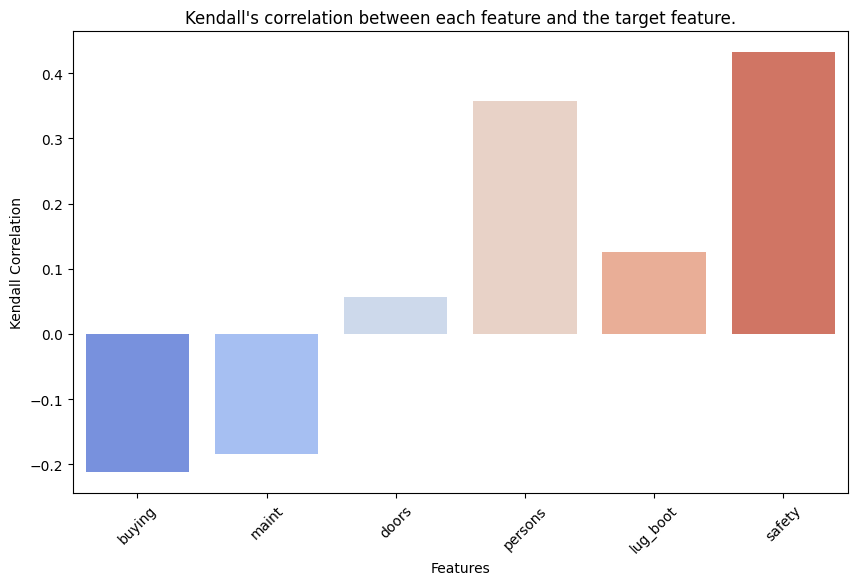

In [ ]:
# Compute the 'Kendall' correlation between each feature and the target feature
# 'class'.
corr_with_target = cars_dataset.corr(method='kendall')['class'].drop('class')

# Creation of the 'Barplot'.
plt.figure(figsize=(10, 6))
sns.barplot(
    x=corr_with_target.index, y=corr_with_target.values, palette='coolwarm',
)
plt.title("Kendall's correlation between each feature and the target feature.")
plt.xlabel('Features')
plt.ylabel('Kendall Correlation')
plt.xticks(rotation=45)
plt.show()


# Creating a KNN model using 'Grid Search'

In [ ]:
scaler = StandardScaler()
X = cars_dataset.iloc[:, 0:-1]
y = cars_dataset[['class']]

# Split the dataset in 'train' and 'test' set.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)
# KNN model training
knn = GridSearchCV(
    KNeighborsClassifier(),
     {
         'n_neighbors': np.arange(2, 21, 1),
         'weights': ['uniform', 'distance'],
    },
    scoring='balanced_accuracy', cv=5,
  )
scaler.fit(X_train)
knn.fit(scaler.transform(X_train), y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20]),
                         'weights': ['uniform', 'distance']},
             scoring='balanced_accuracy')

# Printing Accuracy

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
accuracy_score(y_test, knn.predict(X_test))

0.9576107899807321

In [ ]:
knn.best_params_

{'n_neighbors': 6, 'weights': 'distance'}

# Some samples to test the KNN prediction

In [ ]:
class_mapping_n_to_str[knn.predict(X_test)[100]]

'unacc'

In [ ]:
class_mapping_n_to_str[int(y_test.iloc[100])]

<ipython-input-15-7415ef77a999>:1: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  class_mapping_n_to_str[int(y_test.iloc[100])]


'unacc'

In [ ]:
class_mapping_n_to_str[knn.predict(X_test)[200]]

'unacc'

In [ ]:
class_mapping_n_to_str[int(y_test.iloc[200])]

<ipython-input-17-b189da5ec48c>:1: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  class_mapping_n_to_str[int(y_test.iloc[200])]


'unacc'

In [ ]:
class_mapping_n_to_str[knn.predict(X_test)[123]]

'unacc'

In [ ]:
class_mapping_n_to_str[int(y_test.iloc[123])]

<ipython-input-19-d9f4a5c343e2>:1: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  class_mapping_n_to_str[int(y_test.iloc[123])]


'unacc'

# New hand-created data

In [ ]:
new_data = {
    'buying': [0, 3, 2],
    'maint': [0, 1, 0],
    'doors': [0, 5, 4],
    'persons': [0, 5, 4],
    'lug_boot':[0, 2, 1],
    'safety':[0, 3, 1],
}

new_df = pd.DataFrame(new_data, index=[0, 1, 2])


transform_df = scaler.transform(new_df)

transform_df

array([[-1.37199669, -1.32957965, -3.1342116 , -2.93298514, -1.23546044,
        -1.21218951],
       [ 1.32368694, -0.44245945,  1.31119176,  1.05664023,  1.21117621,
         2.46698316],
       [ 0.42512573, -1.32957965,  0.42211109,  0.25871516, -0.01214212,
         0.01420138]])

## First Row

In [ ]:
class_mapping_n_to_str[knn.predict(transform_df)[0]]

'unacc'

In [ ]:
new_df.iloc[[0]]

,buying,maint,doors,persons,lug_boot,safety
0,0,0,0,0,0,0


## Second Row

In [ ]:
class_mapping_n_to_str[knn.predict(transform_df)[1]]

'acc'

In [ ]:
new_df.iloc[[1]]

,buying,maint,doors,persons,lug_boot,safety
1,3,1,5,5,2,3


## Third Row

In [ ]:
class_mapping_n_to_str[knn.predict(transform_df)[2]]

'acc'

In [ ]:
new_df.iloc[[2]]

,buying,maint,doors,persons,lug_boot,safety
2,2,0,4,4,1,1


# Creating a Confusion Matrix

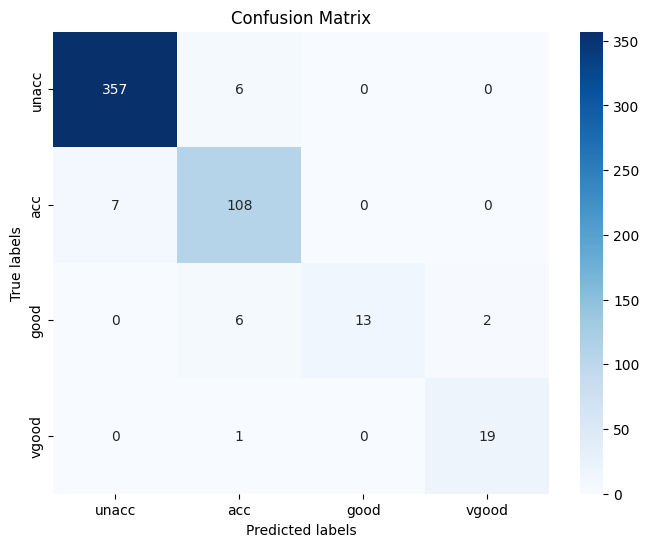

              precision    recall  f1-score   support

       unacc       0.98      0.98      0.98       363
         acc       0.89      0.94      0.92       115
        good       1.00      0.62      0.76        21
       vgood       0.90      0.95      0.93        20

    accuracy                           0.96       519
   macro avg       0.94      0.87      0.90       519
weighted avg       0.96      0.96      0.96       519



In [ ]:
# Prediction on the test set
y_pred = knn.predict(X_test)

# Confusion matrix computation
cm = confusion_matrix(y_test, y_pred)

# Confusion matrix visualisation
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm, annot=True, cmap='Blues', fmt='d',
    xticklabels=class_mapping_n_to_str.values(),
    yticklabels=class_mapping_n_to_str.values(),
)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Printing the classification report
class_names = class_mapping_n_to_str.values()
print(classification_report(y_test, y_pred,target_names = class_names))
